<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [29]:
df = pd.read_csv('states_edu.csv')

Chosen test: Does Total Revenue have an effect on 4th grade reading?

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [30]:
df.dropna()
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)# I just decided to drop rows with null values instead of doing in depth cleanup.

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [31]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL']
# I will be using the new variable new variable which represents expenditure per student, but without the all enroll.

Final feature list: **AVG_READING_4_SCORE', 'TOTAL_REVENUE','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR'**

Feature selection justification: **I chose these features because I think that the money provided to school disctricts for support services should have a strong correlation with how students do on their reading test. I also wanted to include the other variables to see if their could be any other correlations with the total revenue that a district has and the year as well for time.**

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 4th grade reading scores')

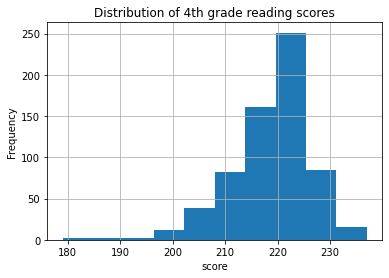

In [32]:
df.AVG_READING_4_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade reading scores')

**Here, we can see the distribution of 4th grade reading scores which is a bit skewed left.**

Visualization 2

Text(0, 0.5, '4th grade reading score')

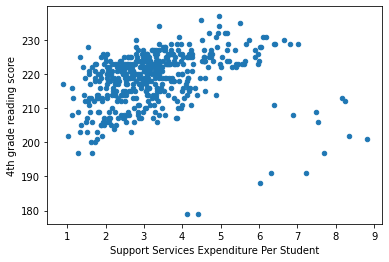

In [33]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',y='AVG_READING_4_SCORE')
plt.xlabel('Support Services Expenditure Per Student')
plt.ylabel('4th grade reading score')

**From the scatterplot, we can see that there could be a positive strong relationship between 4th grade reading scores and Support Services Expenditure per student until we hit the 7 mark on our x-axis where we see 11 outliers.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df[['TOTAL_REVENUE','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [37]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [38]:
# create your model here
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

-622.8061258472344
[8.26516890e-09 3.03786394e-02 4.19223701e-01]


In [52]:
#the R**2 for my value that measures the power of my equation and how well it fits my least squares regession line.
#It is not too good at all! Very low which means it does not fit the line at all. Not a good predictor.
model.score(X_test, y_test)

0.1341164209727871

In [54]:
# mean error — Not good either
np.mean(model.predict(X_test)-y_test)

-0.48402986456582436

In [56]:
# root mean squared error -- penalizes large errors
# The root mean squared error is so big which means that my regression model does not fit the data well at all.
np.mean((model.predict(X_test)-y_test)**2)**0.5

8.114125217986405

In [42]:
# for classification:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
                         #cmap=plt.cm.Blues)

Text(0, 0.5, 'Reading 4 score')

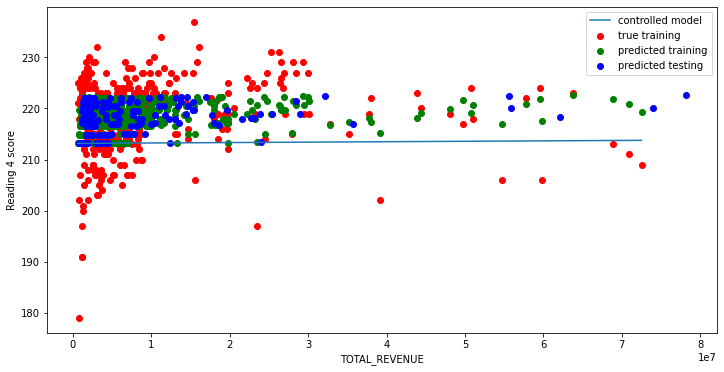

In [60]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'TOTAL_REVENUE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')


<h2> Summary </h2>

Let's be honest I may have done most of this checkpoint wrong. BUT I am committed to learning the ways of data science! I can takeaway from my R^2 coeeficient that the least squares regression line that my regression model utilized does not fit the data whatsoever because of its low value of 0.134. I also got a very high root mean squared error which means that the model is very off causing big errors when followed with the data. It also seems when looking at my final visualization that the predicted training and testing is quite off compared to the true training. 